In [1]:
# Import libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./movie_reviews.csv')
data.sample(5)

,review,sentiment
47491,with what they had. John and Carolyn were very...,positive
41299,"Why did I go to see this film? Honestly, becau...",negative
27699,"Dallas stars Gary Cooper, Ruth Roman, Steve Co...",positive
45501,Dekalog Five was an interesting viewing experi...,positive
22622,"No, it's not the horror movie...This one is ac...",negative


In [3]:
data.shape

(50000, 2)

In [4]:
# Mapping sentiment to integer labels
sentiment_mapping = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
data = data.sample(1000)

In [7]:
data['sentiment'].value_counts()

0    517
1    483
Name: sentiment, dtype: int64

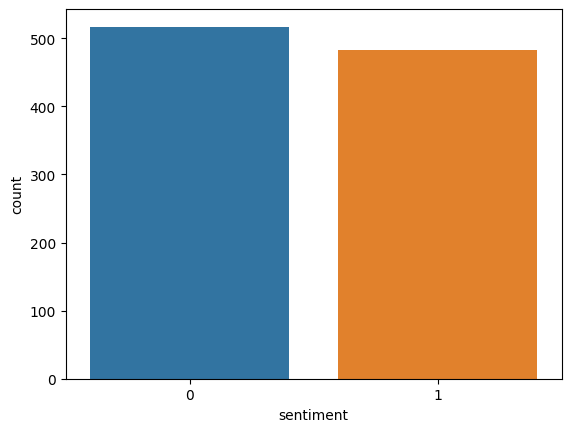

In [8]:
sns.countplot(x='sentiment',data = data)
plt.show()

### Step 1: Data Clean up

In [9]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [10]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

### Preparing the text for ML model 

In [11]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

X = data['review'] 
y = data['sentiment']

my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf = TfidfVectorizer(stop_words=list(stop),
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 12)

### Train the data with Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model with test data

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Now apply those above metrics to evaluate your model
y_pred = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test, y_pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, y_pred))

The accuracy score is: 0.7633333333333333
The confusion matrix is: 
 [[124  38]
 [ 33 105]]


### Visualize the evaluation results

Accuracy: 0.763
Precision: 0.734
Recall: 0.761
F1 Score: 0.747


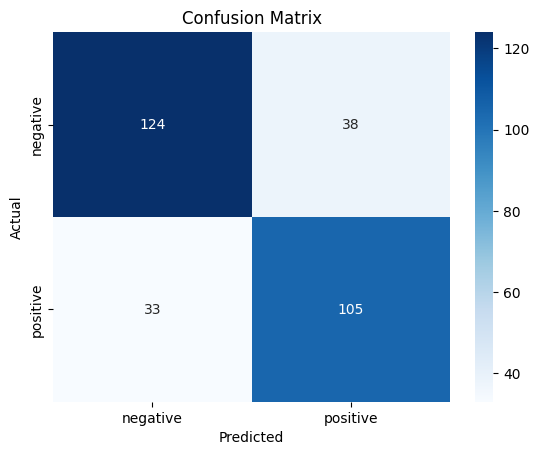

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

# Define class labels
class_labels = ["negative", "positive"]

# Create a heatmap
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display accuracy, precision, recall, and F1 score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

plt.show()